(deconvolution:extract_psf)=
# Determining the point-spread-function from a bead image
In order to deconvolve a microsocpy image properly, we should determine the point-spread-function (PSF) of the microscope.

In [1]:
import numpy as np
from skimage.io import imread, imsave
from scipy.signal import convolve
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle

The example image data used here was acquired by Bert Nitzsche and Robert Haase (both MPI-CBG at that time) at the Light Microscopy Facility of MPI-CBG. Just for completeness, the voxel size is 0.022x0.022x0.125 µm^3.

In [2]:
bead_image = imread('../../data/Bead_Image1_crop.tif')
bead_image.shape

(41, 150, 150)

Our example image shows fluorescent beads, ideally with a diameter smaller than the resolution of the imaging setup. Furthermore, the beads should emit light in the same wavelength as the sample we would like to deconvolve later on. In the following image crop we see four fluorescent beads. It is recommended to image a larger field of view, with at least 25 beads. Also make sure that the beads do not stick to each other and are sparsely distributed.

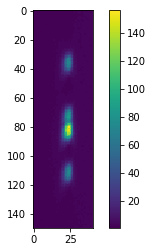

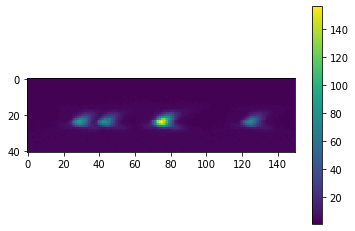

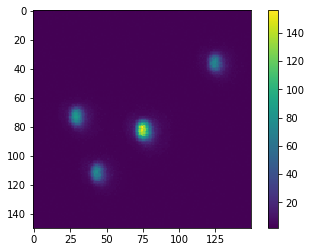

In [3]:
imshow(cle.maximum_x_projection(bead_image), colorbar=True)
imshow(cle.maximum_y_projection(bead_image), colorbar=True)
imshow(cle.maximum_z_projection(bead_image), colorbar=True)

For determining an average PSF, technically we would need to crop out all the individual beads, align them and then average the images.

However, there is a trick to determine the PSF. For that, we make a perfect PSF, an black image with a single white pixel in the center. Afterwards, we convolve the perfect PSF with the images showing beads using [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). This will result in an average PSF image. Note: This will only work if there are no other objects in the image.

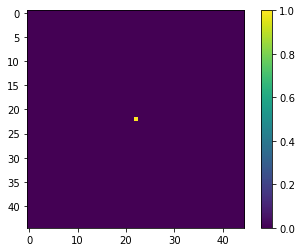

In [4]:
perfect_psf = np.zeros((45,45,45))
perfect_psf[22,22,22] = 1

imshow(perfect_psf, colorbar=True)

In [5]:
# create a PSF image from the perfect_psf which should have the 'same' size
psf = convolve(perfect_psf, bead_image, mode='same')

We can then inspect the average PSF in 3D. If the PSF is a bit off-center, this is not a big problem. However, if it touches the image boarde, that can cause problems later on.

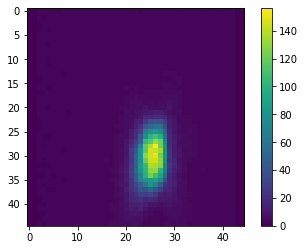

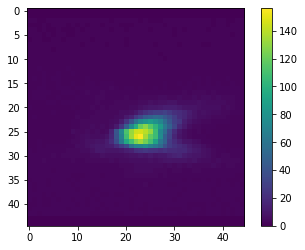

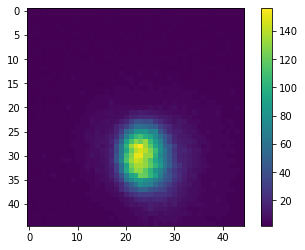

In [6]:
imshow(cle.maximum_x_projection(psf), colorbar=True)
imshow(cle.maximum_y_projection(psf), colorbar=True)
imshow(cle.maximum_z_projection(psf), colorbar=True)

We can move the PSF around by putting the white pixel in the perfect PSF in different places.

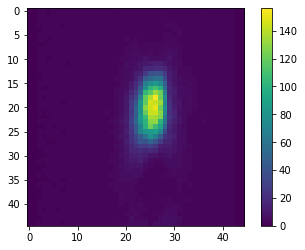

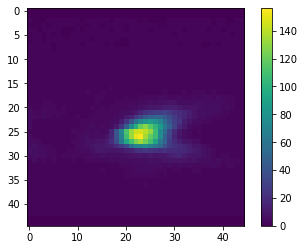

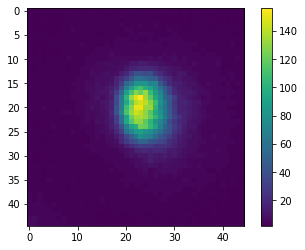

In [7]:
perfect_psf = np.zeros((45,45,45))
perfect_psf[22,12,22] = 1

# extract PSF
psf = convolve(perfect_psf, bead_image, mode='same')

# show result
imshow(cle.maximum_x_projection(psf), colorbar=True)
imshow(cle.maximum_y_projection(psf), colorbar=True)
imshow(cle.maximum_z_projection(psf), colorbar=True)

After we determined a well centered PSF, we can save it for later re-use. Before doing that, we normalize the PSF. Goal is to have an image where the total intensity is `1`. This makes sure that an image that is deconvolvolution using this PSF later on does not modify the image's intensity range.

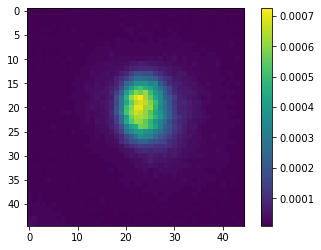

In [8]:
normalized_psf = psf / np.sum(psf)

imshow(normalized_psf, colorbar=True)

In [9]:
imsave('../../data/psf.tif', normalized_psf)

/var/folders/p1/6svzckgd1y5906pfgm71fvmr0000gn/T/ipykernel_8456/3265681491.py:1: UserWarning: ../../data/psf.tif is a low contrast image
  imsave('../../data/psf.tif', normalized_psf)
